# PCA  
Fomular source:   
https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643    

https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd 

## Process
#### 1. Take the whole dataset consisting of d+1 dimensions and ignore the labels (target data for supervised learning) such that our new dataset becomes d dimensional (for unsupervised learning).  
Where d: train data x, y: train label 
X shape (m, n)  
$i$: sample $i = 1, 2, ..., m$   
$j$: feature $j = 1, 2, ..., n$  

#### 2. Standardize each feature values of X. 
$$X scaled_j = \frac{(X_j - mean_j)}{std_j} $$ 
where $j$: $j$-th feature  
$mean(X scaled_j) = 0$  
$std(X scaled_j) = 1$  

#### 3. Compute the covariance matrix of the standardized features from the dataset.
$$cov(X_1, X_2) = \sum_{i=1}^{m} \frac{(X_1^i - mean_{X_1})(X_2^i - mean_{X_2})}
{(n-1)}$$ 
$$
covariance \: matrix \: \Sigma = 
\begin{bmatrix}
cov(x_1, x_1) & cov(x_1, x_2) & ... & cov(x_1, x_n) \\
cov(x_1, x_1) & cov(x_1, x_2) & ... & cov(x_1, x_n) \\
: &: & ... & : \\
cov(x_n, x_1) & cov(x_n, x_2) & ... & cov(x_n, x_n) \\
\end{bmatrix}
$$  
Since the feature columns have been standardized and therefore they each have a mean of zero, the covariance matrix Σ can be calculated by the following:
$$\Sigma = \frac{1}{n-1} X^tX$$

#### 4. Perform eigendecomposton on the covariance matrix.  
Eigenvalue and Eigenvector source:  
https://www.mathsisfun.com/algebra/eigenvalue.html  

For a square marix $A$, an eignevector and eigenvalue is defined:
$$Av = \lambda v$$  
$$Av - \lambda Iv = 0 \quad => \quad |A - \lambda I| = 0$$
As the covariance matrix $\Sigma$ is a square matrix:  
$$\Sigma v = \lambda v$$  
Calculate the eigenvalues $\lambda$ of $\Sigma$ by the characteristic equation:
$$det(\Sigma - \lambda I) = 0$$   
$$\lambda = \begin{bmatrix} \lambda_1 & \lambda_2 & ... & \lambda_n \end{bmatrix}$$
Since we know $\Sigma$ and $\lambda$, we can define eigenvector $v$.   

where   
$v$: eigenvector  
$\lambda$ eigenvalue  

#### 5. Order the eigenvectors in decreasing order based on the magnitude of their corresponding eigenvalues.

#### 6. Determine k, the number of top principal components to select.
Determin k dimensions based on a plot the cumulative sum of the sorted eigenvalues.  
$$cumulative \: sum \: of \: \frac{\lambda_{j^*}}{\sum_{j^*=1}^n\lambda_{j^*}}$$

Selected K eigenvalues:
$$\lambda = \begin{bmatrix} \lambda_1 & \lambda_2 & ... & \lambda_k \end{bmatrix}$$  

where   
$j^*$: sorted eigenvalues $1, 2, 3, ... n$ in descreasing order    

#### 7. Construct the projection matrix from the chosen number of top principal components.
Eigenvector Matrix of size $(n, k)$ using the selected eigenvalues $\lambda_{1...k}$ on $\Sigma v = \lambda v$:  
$$W_{n*k}$$   
where  
$n$: number of all features  
$k$: selected number of dimesions (principals)  

#### 8. Compute the new k-dimensional feature space.
Transform the samples onto the new subspace of k-dimentions:  
$$ y = W^t * X $$  
Where 
$W^t$:

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [31]:
# Generate PCA data set
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=50, 
    shift=3,
    scale=2,
    n_features=7, n_informative=4, n_redundant=2, n_repeated=0,
    n_classes=3, n_clusters_per_class=1,
    shuffle=True,
    random_state=42)
"""
Restrictions:
    n_informative + n_redundant + n_repeated < n_features
    n_classes * n_clusters_per_class <= 2**n_informative
    np.log2(n_classes * n_clusters_per_class) < n_informative
Parameters:
    n_informative: This parameter specifies the number of informative features in the dataset. Informative features are the ones that actually contribute to the predictive power of the model. In other words, these features are relevant for distinguishing between different classes in the dataset. Setting a higher value for n_informative increases the complexity of the classification task as there are more features that contain useful information.

    n_redundant: This parameter specifies the number of redundant features in the dataset. Redundant features are linear combinations of informative features. They do not add any additional information to the dataset but may help in training more robust models. Having redundant features can sometimes make the dataset more challenging to learn from as the model needs to differentiate between informative and redundant features.

    n_repeated: This parameter specifies the number of duplicated features in the dataset. Duplicated features are copies of informative or redundant features. Like redundant features, duplicated features do not provide new information but may add noise to the dataset. However, unlike redundant features, duplicated features are exact copies rather than linear combinations.

    These parameters allow you to control the complexity and structure of the synthetic dataset generated by make_classification, enabling you to create datasets with specific characteristics for testing and evaluating classification algorithms.
    ------------------------
    n_classes: This parameter specifies the number of classes (distinct categories or labels) in the classification problem. Each sample in the dataset will be assigned one of these classes as its label. For example, if n_classes is set to 3, the dataset will have three distinct classes, and samples will be labeled with integers from 0 to 2.

    n_clusters_per_class: This parameter specifies the number of clusters per class. Each class can be generated with multiple clusters, and samples belonging to the same class may be clustered together in the feature space. This parameter influences the separability of the classes in the generated dataset. Setting a higher value for n_clusters_per_class can result in more complex and overlapping clusters, making the classification task more challenging.
""" 

'\nRestrictions:\n    n_informative + n_redundant + n_repeated < n_features\n    n_classes * n_clusters_per_class <= 2**n_informative\n    np.log2(n_classes * n_clusters_per_class) < n_informative\nParameters:\n    n_informative: This parameter specifies the number of informative features in the dataset. Informative features are the ones that actually contribute to the predictive power of the model. In other words, these features are relevant for distinguishing between different classes in the dataset. Setting a higher value for n_informative increases the complexity of the classification task as there are more features that contain useful information.\n\n    n_redundant: This parameter specifies the number of redundant features in the dataset. Redundant features are linear combinations of informative features. They do not add any additional information to the dataset but may help in training more robust models. Having redundant features can sometimes make the dataset more challenging 

Data shape: 50 7


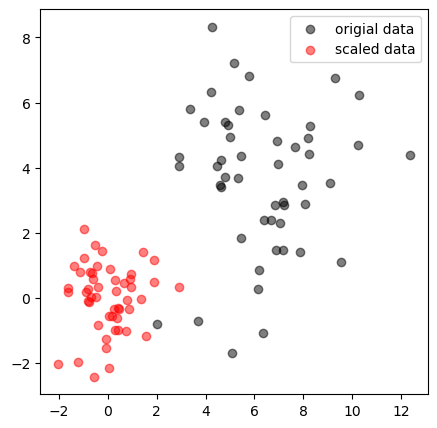

covariance matrix: 
[[ 1.02040816  0.05118299  0.07415209 -0.03165786  0.09525758 -0.10174406
  -0.0477655 ]
 [ 0.05118299  1.02040816  0.11259294 -0.14508917  0.01725741  0.09305154
   0.52561667]
 [ 0.07415209  0.11259294  1.02040816 -0.27169099 -0.047594    0.11275096
   0.51481631]
 [-0.03165786 -0.14508917 -0.27169099  1.02040816 -0.87017388 -0.83529624
  -0.69565324]
 [ 0.09525758  0.01725741 -0.047594   -0.87017388  1.02040816  0.49883853
   0.23624236]
 [-0.10174406  0.09305154  0.11275096 -0.83529624  0.49883853  1.02040816
   0.8199227 ]
 [-0.0477655   0.52561667  0.51481631 -0.69565324  0.23624236  0.8199227
   1.02040816]]
eigenvalues:
[ 3.20283145e+00  5.36873287e-01  1.08425469e+00  1.40111471e+00
  9.17783011e-01  3.95498499e-16 -1.04316139e-16]
eigenvectors: 
[[-1.94234018e-03 -3.41026139e-01  9.39341836e-01  7.53226811e-03
  -3.57432597e-02 -9.25590244e-18  3.21941180e-17]
 [-1.89531974e-01  2.86597887e-01  7.18765490e-02  5.14494881e-01
  -7.26774019e-01  1.92238722e-

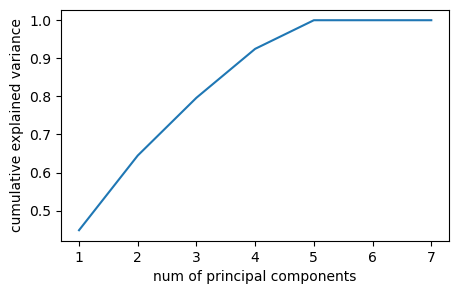

projected matrix, W: 
[[-0.00194234  0.00753227]
 [-0.18953197  0.51449488]
 [-0.2104083   0.50927873]
 [ 0.53647606  0.23560667]
 [-0.37765576 -0.51809936]
 [-0.49588791 -0.12922068]
 [-0.4934237   0.36774722]]


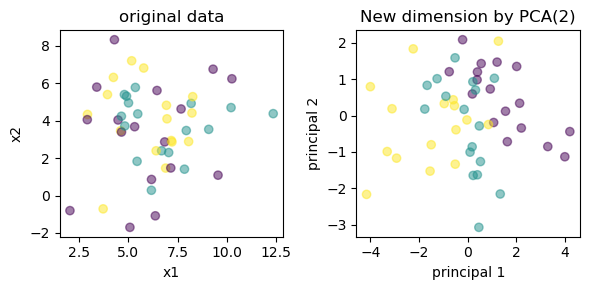

In [55]:
# 1. prepare d-dimension data 
# data shape (m: samples, n: features)
m, n = X.shape
print("Data shape:", m, n)

# 2. Standardize the data by each feature
def standardize(X):
    """standardize data by feature"""
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_scale = standardize(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c='black', label='origial data', alpha=0.5)
plt.scatter(X_scale[:, 0], X_scale[:, 1], c='red', label='scaled data', alpha=0.5)
plt.legend()
plt.show()


# 3. CompCompute the covariance matrix of the features from the dataset.ute 
# cov =  (x-x_mean)(y-y_min) / (m-1), m= # of samples
# cov_matrix = [[cov 1, ... , n],... ,[[cov n,,, , cov n]]] . => n*n matrix  ,n= # of features
# cov_matrix = ((X_scale - X_scale.mean(axis=0)).T) @ (X_scale - X_scale.mean(axis=0)) / (m-1)
# as X_scale's mean is zero:
cov_matrix = X_scale.T @ X_scale / (m-1)
print('covariance matrix: ', cov_matrix,sep='\n')

# 4. Perform eigendecomposton on the covariance matrix.  
# cov_marix*v = lambda*v
#v eigenvector, lambda eigenvalue
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print("eigenvalues:", eig_values, "eigenvectors: ", eig_vectors, sep='\n')

# 5. Order the eigenvectors in decreasing order based on 
# the magnitude of their corresponding eigenvalues.
sorted_idx =np.argsort(eig_values)[::-1]
sorted_eig_values = eig_values[sorted_idx]
print("sorted eigenvalues' index: ", sorted_idx)
sorted_eig_vector = eig_vectors[:, sorted_idx]
print("sorted eigenvector: ", sorted_eig_vector, sep='\n')
# 6. Determine k, the number of top principal components to select.
cum_eig_values = np.cumsum(sorted_eig_values) / np.sum(sorted_eig_values)
xint = np.arange(1, cum_eig_values.shape[0] + 1)
plt.figure(figsize=(5,3))
plt.plot(xint, cum_eig_values)
plt.xticks(xint)
plt.xlabel('num of principal components')
plt.ylabel('cumulative explained variance')
plt.show()
# based on the chart define k
k = 2
# 7. Construct the projection matrix from the chosen number of top principal components.
# (m, n) => (m, k)
# projection matrx, w = selected eigenvectors : (n, n) => (n, k) 
W = sorted_eig_vector[:, :k]
print('projected matrix, W: ', W, sep='\n')

# 8. Compute the new k-dimensional feature space.
#  new feature space, y = x @ w
# W: (n, k), X: (m,n), y: (k, n)
feature_space = X_scale @ W

# 9. scale back to original 

#ploting transformed data 
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('original data')

plt.subplot(122)
plt.scatter(feature_space[:, 0], feature_space[:, 1], c=y, alpha=0.5)
plt.xlabel('principal 1')
plt.ylabel('principal 2')
plt.title(f'New dimension by PCA({k})')
plt.tight_layout()
plt.show()

## Comparing to Scikit-Learn

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(standardize(X))
sk_new_features = pca.transform(standardize(X))

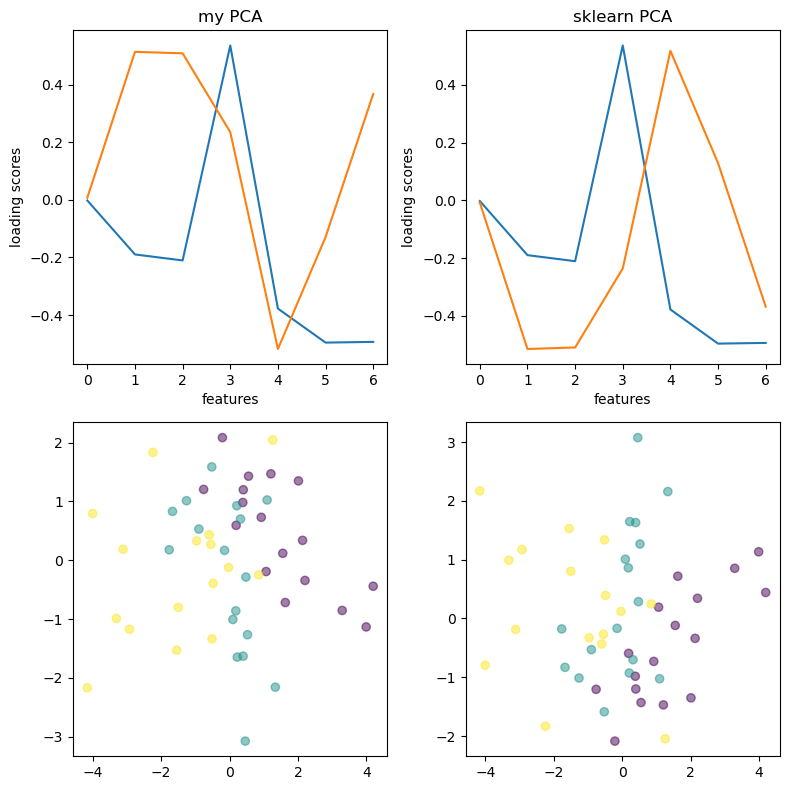

In [72]:
plt.figure(figsize=(8 ,8))
plt.subplot(221)
plt.plot(W)
plt.xlabel('features')
plt.ylabel('loading scores')
plt.title("my PCA")
plt.subplot(222)
plt.plot(pca.components_.T)
plt.xlabel('features')
plt.ylabel('loading scores')
plt.title("sklearn PCA")
plt.subplot(223)
plt.scatter(feature_space[:, 0], feature_space[:, 1], c=y, alpha=0.5)
plt.subplot(224)
plt.scatter(sk_new_features[:, 0], sk_new_features[:, 1], c=y, alpha=0.5)
plt.tight_layout()
plt.show()
